In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [32]:
text="""where you can find activities to practise your reading skills. Reading will help you to improve your understanding of the language and build your vocabulary.

The self-study lessons in this section are written and organised by English level based on the Common European Framework of Reference for languages (CEFR). There are different types of texts and interactive exercises that practise the reading skills you need to do well in your studies, to get ahead at work and to communicate in English in your free time.

Take our free online English test to find out which level to choose. Select your level, from A1 English level (elementary) to C1 English level (advanced), and improve your reading skills at your own speed, whenever it's convenient for you."""

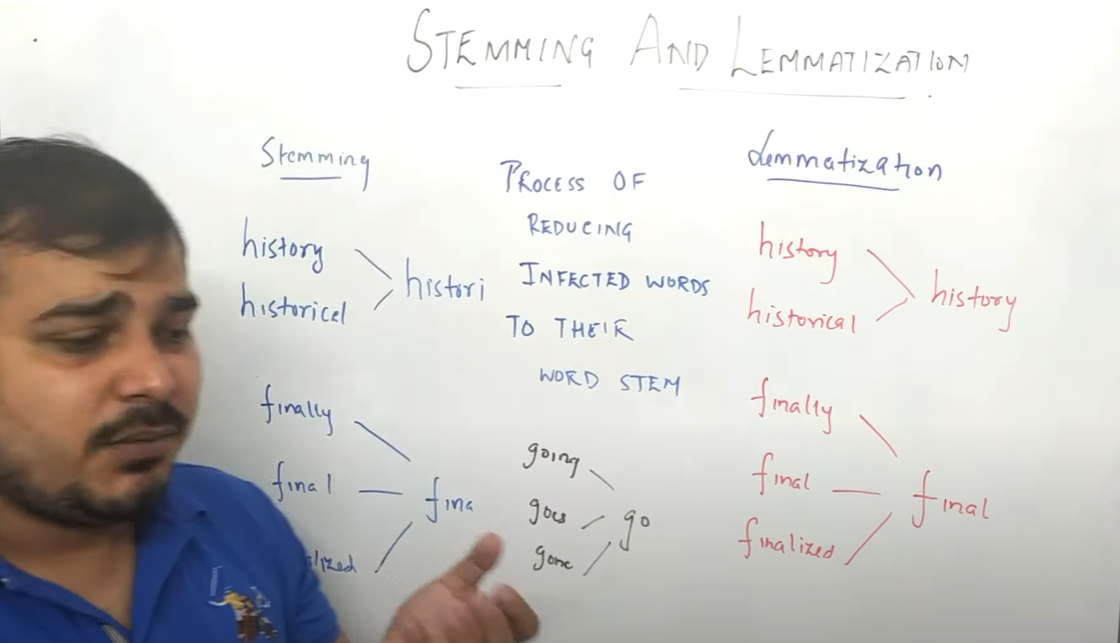

In [28]:
sentences=nltk.sent_tokenize(text)

In [11]:
# words=nltk.word_tokenize(text)
# words

STEMMING

In [12]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [21]:
stremmer=PorterStemmer()
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[stremmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=" ".join(words)
#     print(sentences)

LEMMATIZATION

In [22]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer=WordNetLemmatizer()
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i]=" ".join(words)

Bag of words. Binary and Bow. 1.Binary=if the word is in that sentence will be 1 or 0. In bow bag of words we put the frequency of that word.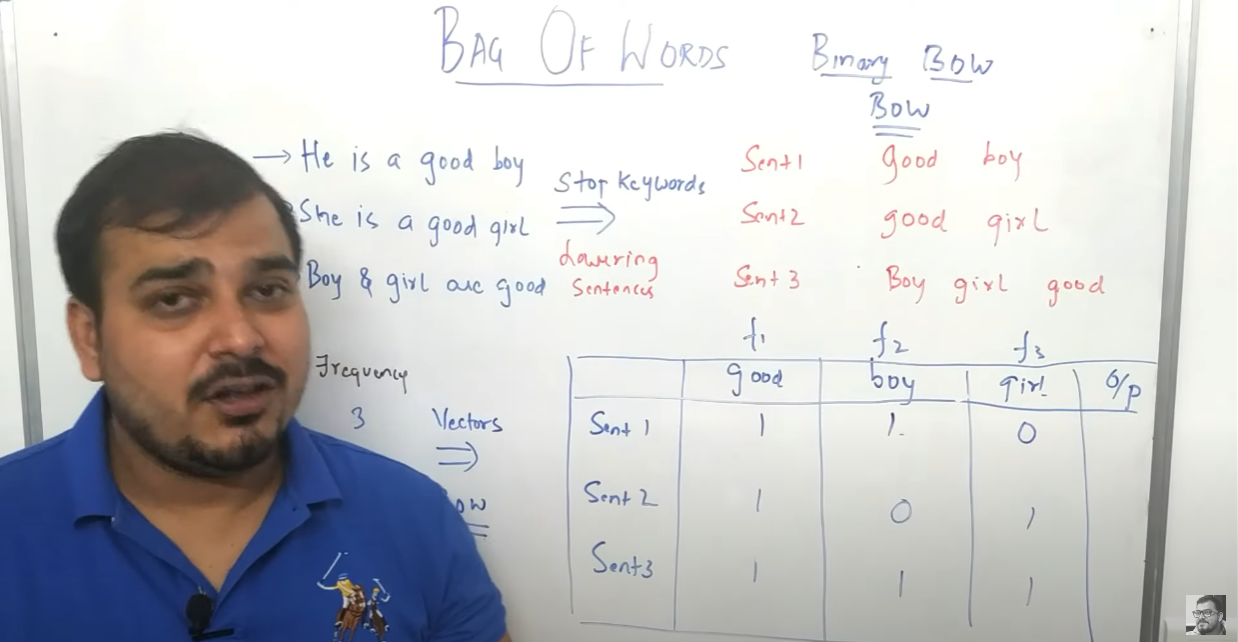

BAG OF WORDS in code.

In [39]:
import re 
import pandas
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

wordnet=WordNetLemmatizer()
sentences=nltk.sent_tokenize(text)
corpus=[]
for i in range(len(sentences)):
    review=re.sub('[^a-zA-Z]',' ',sentences[i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
pandas.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,1,1,1,0,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


TF-IDF method for converting text to numbers.

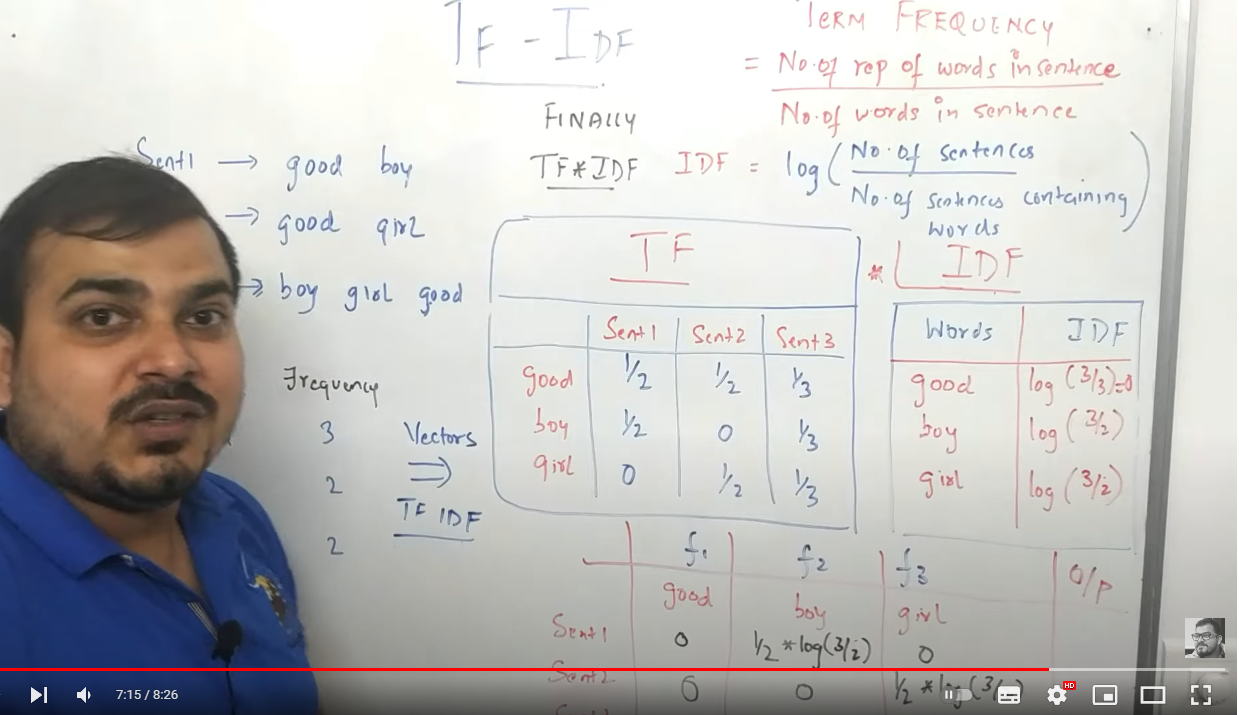

In [40]:
text="""where you can find activities to practise your reading skills. Reading will help you to improve your understanding of the language and build your vocabulary.

The self-study lessons in this section are written and organised by English level based on the Common European Framework of Reference for languages (CEFR). There are different types of texts and interactive exercises that practise the reading skills you need to do well in your studies, to get ahead at work and to communicate in English in your free time.

Take our free online English test to find out which level to choose. Select your level, from A1 English level (elementary) to C1 English level (advanced), and improve your reading skills at your own speed, whenever it's convenient for you."""

In [ ]:
import nltk
import re
import pandas
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

wordnet=WordNetLemmatizer()
sentences=nltk.sent_tokenize(text)
corpus=[]
for i in range(len(sentences)):
    review=re.sub('[^a-zA-Z]',' ',sentences[i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
X=cv.fit_transform(corpus).toarray()
pandas.DataFrame(X)

    WORD2VEC method of encoding text. 
    

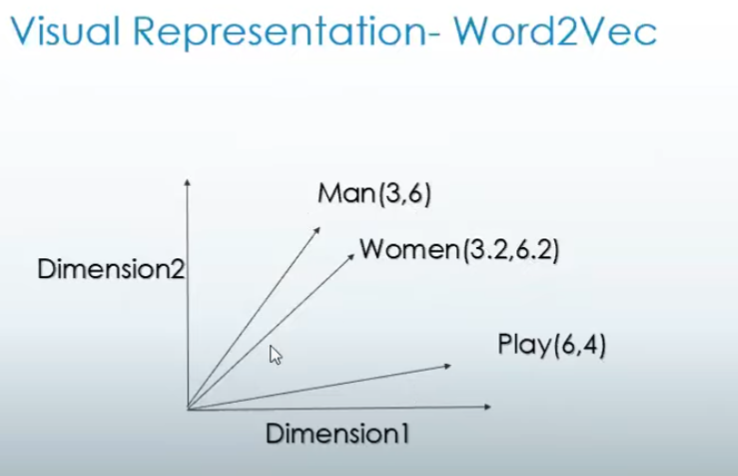

In [63]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re 

text="""The comparison of standards of the cities and small town or villages has been always a debate. Recently, 
teenagers choose to live in the cities rather than their home villages because of school or job opportunities. 
This essay will discuss multiple reasons behind this trend and explain why the advantages of being in a city do 
indeed outweigh its drawbacks.There are several reasons to desire living in urban areas. Firstly, it gives people an 
opportunity to study in better schools which cannot be found in rural areas. Since in the modern world education means very 
much for people’s future, it is crucial to have higher education degrees for those individuals to find well-paid jobs. In addition 
to that, city life provides people with completely different experiences than their home villages. Thanks to the schools, work or social 
gathering places, they get to meet a greater number of people from all around the country compared to their rural towns which is crucial 
for one’s personal development. Lastly, in the cities, not only they get bigger number of job options, but also they can earn larger 
amount of money. It is very well know that job market is significantly limited in the villages also the current jobs barely pay enough.
It is clearly seen that benefits of leaving villages outweigh its few number of deficits. It is worth to mention that people face some 
issues, such as being away from their extended family, more competitive and challenging job market, and substantially more expensive 
living cost, when they move to the cities. Advantages like learning and exploring new experiences, getting a better education leading 
to a better paid job and having an interesting career, however, surpass the number of the drawbacks of this development.
To conclude, there are various reasons for young generation to leave their homes to live in the cities and this movement’s benefits 
easily outweigh its disadvantages."""

In [64]:
text = re.sub(r'\[[0-9]*\]','  ',text)
text = re.sub(r'\s+','  ',text)
text = text.lower()
text = re.sub(r'\d','  ',text)
text = re.sub(r'\s+','  ',text)

In [65]:
sentences=nltk.sent_tokenize(text)
sentences=[nltk.word_tokenize(sentences) for sentences in sentences]

for i in range(len(sentences)):
    sentences[i]=[word  for word in sentences[i] if word not in stopwords.words('english')]

In [66]:
model=Word2Vec(sentences,min_count=1)
# words=model.wv.vocab
wector=model.wv['rural']
similar=model.wv.most_similar('rural')

In [69]:
similar

[('education', 0.3196720778942108),
 ('modern', 0.18891218304634094),
 ('experiences', 0.16210150718688965),
 ('school', 0.14652882516384125),
 ('country', 0.1332206130027771),
 ('various', 0.1315631866455078),
 ('like', 0.13061118125915527),
 ('young', 0.12861675024032593),
 ('addition', 0.12824814021587372),
 ('live', 0.12767106294631958)]

WORD EMBEDDINGS

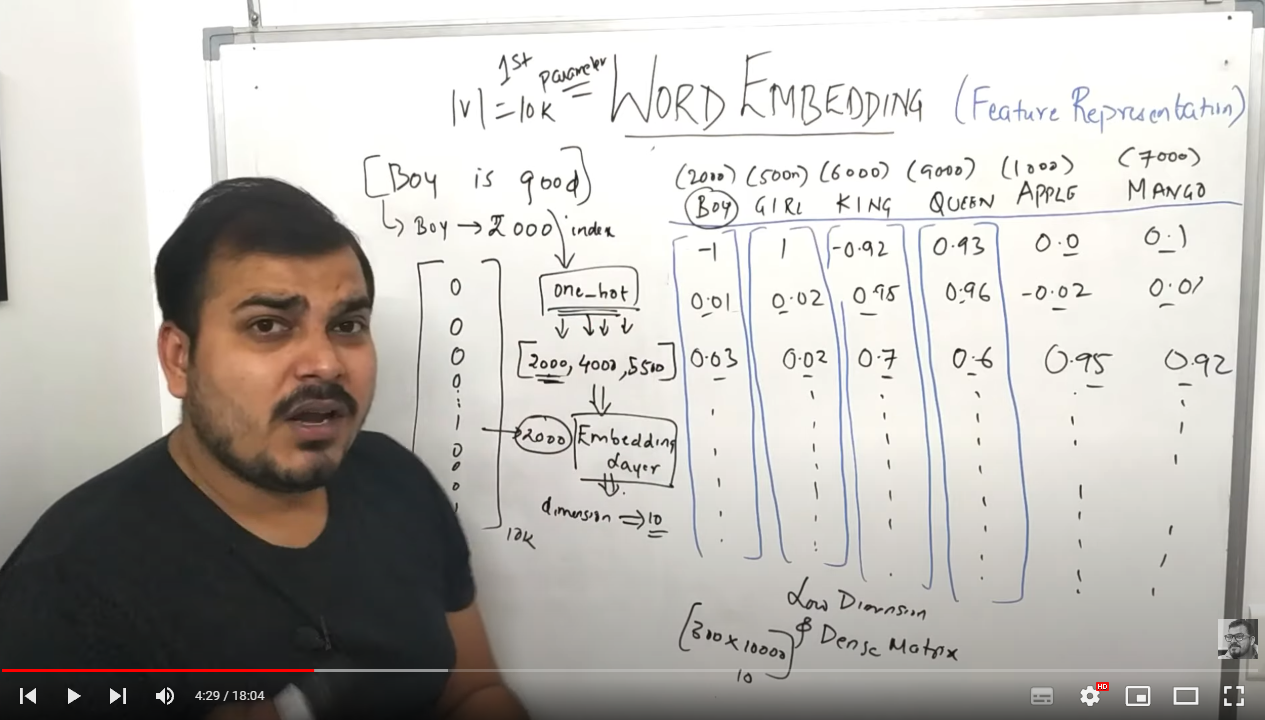